In [38]:
#Importing libraries
import numpy as np
import pandas as pd

In [39]:
#reading data file
filename = 'abc.txt'
data = np.loadtxt(filename,delimiter='\t')

In [40]:
#Separating X and Y columns
x0 = data[0:,0]
y0 = data[0:,1]

In [41]:
#Table
print('x\ty\txy\tx^2\tx^2*y\tx^3\tx^4')

XY = x0*y0
Xr2 = x0**2
Xr2Y = Xr2*y0
Xr3 = x0**3
Xr4 = x0**4

#Actual calculations
x = np.sum(x0)
y = np.sum(y0)
xy = np.sum(XY)
xr2 = np.sum(Xr2)
xr2y = np.sum(Xr2Y)
xr3 = np.sum(Xr3)
xr4 = np.sum(Xr4)
n0 = x0.shape[0]

temp1 = [x,y,xy,xr2,xr2y,xr3,xr4]
temp1_ = np.array(temp1)

#Table required for college
temp = [x0,y0,XY,Xr2,Xr2Y,Xr3,Xr4]
df = np.transpose(np.array(temp))
df = np.vstack((df,temp1))
print(pd.DataFrame(df))

#last row of df is sum



x	y	xy	x^2	x^2*y	x^3	x^4
      0      1       2       3        4        5         6
0  10.0   14.0   140.0   100.0   1400.0   1000.0   10000.0
1  12.0   17.0   204.0   144.0   2448.0   1728.0   20736.0
2  15.0   23.0   345.0   225.0   5175.0   3375.0   50625.0
3  20.0   21.0   420.0   400.0   8400.0   8000.0  160000.0
4  23.0   25.0   575.0   529.0  13225.0  12167.0  279841.0
5  80.0  100.0  1684.0  1398.0  30648.0  26270.0  521202.0


In [42]:
#Guass elimination
n = 3

# Making numpy array of n x n+1 size and initializing 
# to zero for storing augmented matrix
a = np.zeros((n,n+1))

# Making numpy array of n size and initializing 
# to zero for storing solution vector
root = np.zeros(n)

a[0][0]=xr2
a[0][1]=x
a[0][2]=n0
a[0][3]=y
a[1][0]=xr3
a[1][1]=xr2
a[1][2]=x
a[1][3]=xy
a[2][0]=xr4
a[2][1]=xr3
a[2][2]=xr2
a[2][3]=xr2y

# Applying Gauss Elimination
for i in range(n):
    if a[i][i] == 0.0:
        print('Divide by zero detected!')
        break

    for j in range(i+1, n):
        ratio = a[j][i]/a[i][i]

        for k in range(n+1):
            a[j][k] = a[j][k] - ratio * a[i][k]

# Back Substitution
root[n-1] = a[n-1][n]/a[n-1][n-1]

for i in range(n-2,-1,-1):
    root[i] = a[i][n]

    for j in range(i+1,n):
        root[i] = root[i] - a[i][j]*root[j]

    root[i] = root[i]/a[i][i]

In [43]:
#results
print('a = %0.5f \nb = %0.5f \nc = %0.5f' %(root[0],root[1],root[2]))
print('\ny = ax^2+bx+c')
print('y = (%0.5f)x^2 +  (%0.5f)x + (%0.5f)' %(root[0],root[1],root[2]))

a = -0.06950 
b = 3.00993 
c = -8.72790

y = ax^2+bx+c
y = (-0.06950)x^2 +  (3.00993)x + (-8.72790)


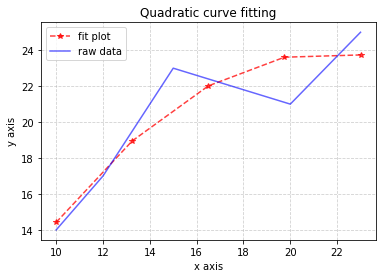

<Figure size 20000x10000 with 0 Axes>

In [44]:
from matplotlib import pyplot as plt

x = np.linspace(x0[0],x0[x0.shape[0]-1],x0.shape[0])
y = root[0]*x**2 + root[1]*x + root[2]

plt.plot(x, y,'r*--',alpha = 0.75,label = 'fit plot')
plt.plot(x0,y0,'b-',alpha = 0.6, label = 'raw data')

plt.title('Quadratic curve fitting')
plt.xlabel('x axis') 
plt.ylabel('y axis') 
plt.grid(alpha =.6, linestyle ='--')
plt.legend()
plt.figure(figsize=(20,10),dpi=1000)

plt.show()